<a href="https://colab.research.google.com/github/JosephHobbs9292/Project2/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [610]:
## Removing the future warnings spam https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as numpy

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
## Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, classification_report,recall_score)

## Set global scikit-learn configuration 
from sklearn import set_config

In [611]:
## Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Cleaning
---

In [612]:
## Loading in the data set
df_heart = pd.read_csv("/content/heart.csv")
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [613]:
## Checking for missing values
df_heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [614]:
## Examing data for impossible values 
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [670]:
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_bin,RestingBP_bin,Cholesterol_bin,MaxHR_bin,Oldpeak_bin
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1.0,3.0,2.0,3.0,1.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,2.0,3.0,1.0,3.0,2.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.0,3.0,2.0,1.0,1.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,2.0,3.0,1.0,1.0,2.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,2.0,3.0,1.0,2.0,1.0


In [615]:
## There are no duplicate rows to contend with
df_heart.duplicated().sum()

0

In [616]:
## Displaying value counts for age column
df_heart["Age"].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [617]:
## Displaying value counts for RestingBP column
df_heart["RestingBP"].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

In [618]:
## Displaying value counts for Cholesterol column
df_heart["Cholesterol"].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [619]:
## Displaying value counts for FastingBS column
df_heart["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [620]:
## Displaying value counts for MaxHR column
df_heart["MaxHR"].value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

In [621]:
## Displaying value counts for Oldpeak column
df_heart["Oldpeak"].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

In [622]:
## Displaying value counts for Oldpeak column
df_heart["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## Data Visualization of All Features and Target
---

Feature engineering all featrues into five bins. 

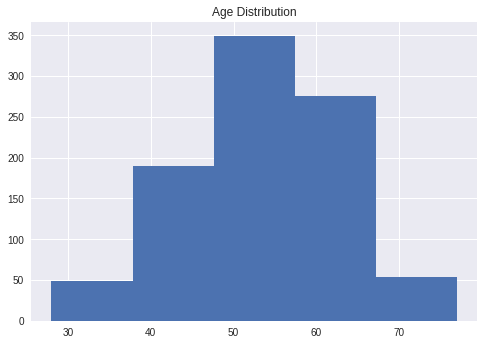

In [623]:
## Data visualization of age feature in 5 bins
plt.style.use('seaborn')
df_heart["Age"].hist(bins = 5);
plt.title("Age Distribution");

In [624]:
## Citation: https://towardsdatascience.com/binning-for-feature-engineering-in-machine-learning-d3b3d76f364a
## Citation: https://numpy.org/devdocs/reference/generated/numpy.histogram_bin_edges.html 
## Citation: https://stackoverflow.com/questions/47053770/pandas-cut-how-to-convert-nans-or-to-convert-the-output-to-non-categorical 

## Binning Age into 5 bins
Age_cut = numpy.histogram_bin_edges(df_heart["Age"], bins = 5)
df_heart["Age_bin"] = pd.cut(df_heart["Age"], Age_cut, labels = False)
Age_median = df_heart["Age_bin"].median
np.where(df_heart["Age_bin"].isnull(), )
df_heart["Age_bin"].value_counts()

2.0    349
3.0    276
1.0    190
4.0     54
0.0     48
Name: Age_bin, dtype: int64

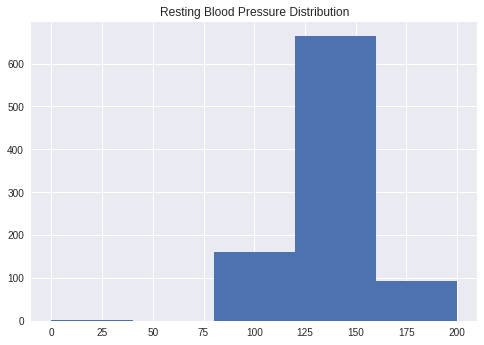

In [625]:
## Data visualization of RestingBP feature in 5 bins
plt.style.use('seaborn')
df_heart["RestingBP"].hist(bins = 5);
plt.title("Resting Blood Pressure Distribution");

In [626]:
## Binning RestingBP into 5 bins
RestingBP_cut = numpy.histogram_bin_edges(df_heart["RestingBP"], bins = 5)
df_heart["RestingBP_bin"] = pd.cut(df_heart["RestingBP"], RestingBP_cut, labels = False)
df_heart["RestingBP_bin"].value_counts()

3.0    582
2.0    291
4.0     43
1.0      1
Name: RestingBP_bin, dtype: int64

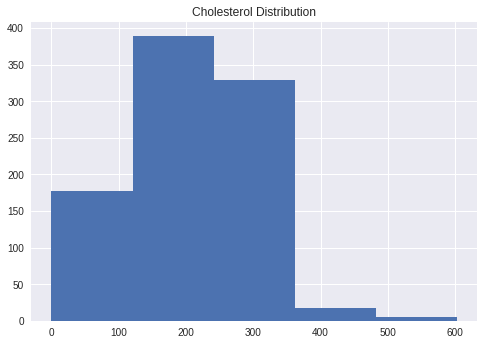

In [627]:
## Data visualization of Cholesterol feature in 5 bins
plt.style.use('seaborn')
df_heart["Cholesterol"].hist(bins = 5);
plt.title("Cholesterol Distribution");

In [628]:
## Binning Cholesterol into 5 bins
Cholesterol_cut = numpy.histogram_bin_edges(df_heart["Cholesterol"], bins = 5)
df_heart["Cholesterol_bin"] = pd.cut(df_heart["Cholesterol"], Cholesterol_cut, labels = False)
df_heart["Cholesterol_bin"].value_counts()

1.0    389
2.0    329
3.0     17
0.0      6
4.0      5
Name: Cholesterol_bin, dtype: int64

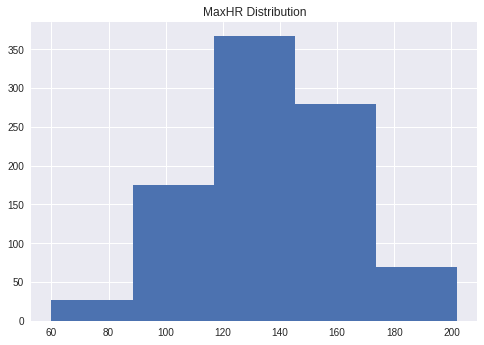

In [629]:
## Data visualization of Cholesterol feature in 5 bins
plt.style.use('seaborn')
df_heart["MaxHR"].hist(bins = 5);
plt.title("MaxHR Distribution");

In [630]:
## Binning MaxHR into 5 bins
MaxHR_cut = numpy.histogram_bin_edges(df_heart["MaxHR"], bins = 5)
df_heart["MaxHR_bin"] = pd.cut(df_heart["MaxHR"], MaxHR_cut, labels = False)
df_heart["MaxHR_bin"].value_counts()

2.0    367
3.0    280
1.0    175
4.0     69
0.0     26
Name: MaxHR_bin, dtype: int64

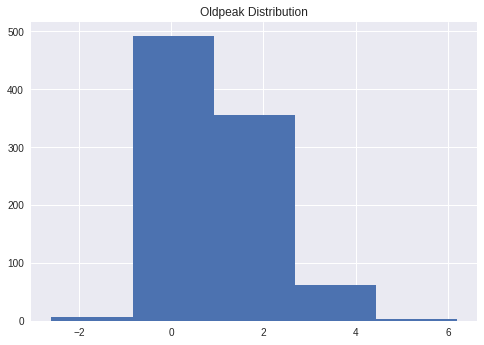

In [631]:
## Data visualization of Oldpeak feature in 5 bins
plt.style.use('seaborn')
df_heart["Oldpeak"].hist(bins = 5);
plt.title("Oldpeak Distribution");

In [632]:
## Binning Oldpeak into 5 bins
Oldpeak_cut = numpy.histogram_bin_edges(df_heart["Oldpeak"], bins = 5)
df_heart["Oldpeak_bin"] = pd.cut(df_heart["Oldpeak"], Oldpeak_cut, labels = False)
df_heart["Oldpeak_bin"].value_counts()

1.0    492
2.0    355
3.0     61
0.0      6
4.0      3
Name: Oldpeak_bin, dtype: int64

In [633]:
## Creating new dataframe with the unbinned columns dropped 
df_heart.reset_index(drop = True)
df_heart_binned = df_heart.drop(columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"])
df_heart_binned.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,Age_bin,RestingBP_bin,Cholesterol_bin,MaxHR_bin,Oldpeak_bin
0,M,ATA,0,Normal,N,Up,0,1.0,3.0,2.0,3.0,1.0
1,F,NAP,0,Normal,N,Flat,1,2.0,3.0,1.0,3.0,2.0
2,M,ATA,0,ST,N,Up,0,0.0,3.0,2.0,1.0,1.0
3,F,ASY,0,Normal,Y,Flat,1,2.0,3.0,1.0,1.0,2.0
4,M,NAP,0,Normal,N,Up,0,2.0,3.0,1.0,2.0,1.0


In [634]:
df_heart_binned.isna().sum()

Sex                  0
ChestPainType        0
FastingBS            0
RestingECG           0
ExerciseAngina       0
ST_Slope             0
HeartDisease         0
Age_bin              1
RestingBP_bin        1
Cholesterol_bin    172
MaxHR_bin            1
Oldpeak_bin          1
dtype: int64

## Correlation Discovery
---

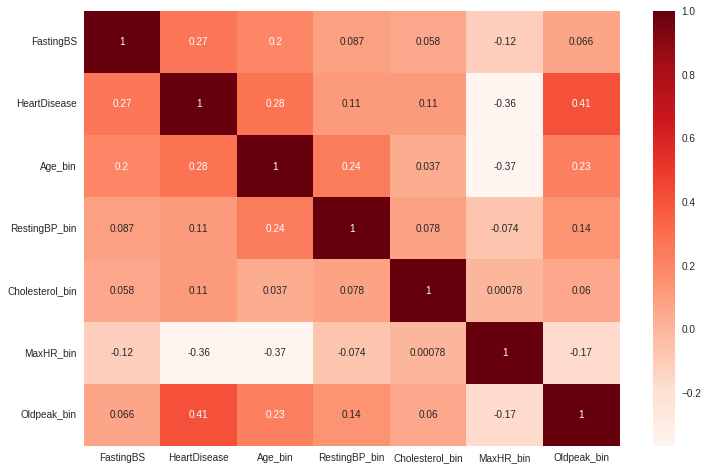

In [635]:
## Exploring correlations using a heatmap
plt.style.use('seaborn')
corr = df_heart_binned.corr()
fig, ax = plt.subplots(figsize =(12,8))
sns.heatmap(corr, cmap = "Reds", annot = True);

## Results
---
There is a some positive correlation between Oldpeak and our target heart disease (0.4). There is also some negative correlation between MaxHR and our heart disease (-0.4). There was also a small correlation between age and heart disease.

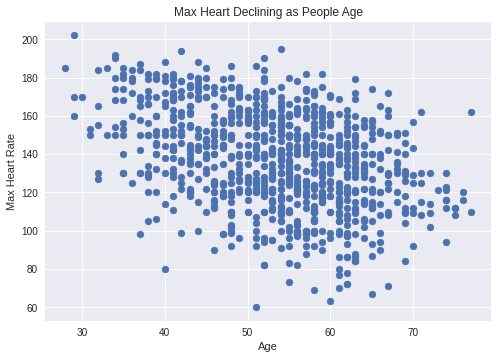

In [636]:
## Trend Analysis
fix, ax = plt.subplots()
ax.scatter(df_heart["Age"], df_heart["MaxHR"]);
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.title("Max Heart Declining as People Age");

## Analysis

Max heart rate delines as people age: as people age their is downward trend where their max heart rate declines. This can be seen in the above graph with 

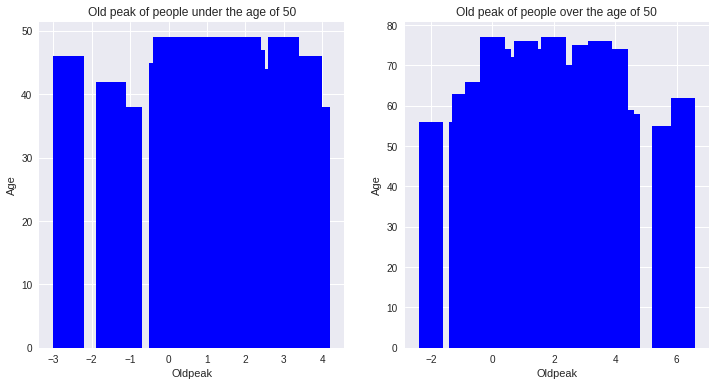

In [637]:
## Trend Analysis
over50 = df_heart["Age"] > 50
under50 = df_heart["Age"] < 50
df_over50 = df_heart[over50]
df_under50 = df_heart[under50]
fig, axes = plt.subplots(ncols = 2, figsize = (12, 6))

axes[0].bar(df_under50["Oldpeak"], df_under50["Age"], color = "blue");
axes[0].set_title("Old peak of people under the age of 50");
axes[0].set_xlabel("Oldpeak");
axes[0].set_ylabel("Age");

axes[1].bar(df_over50["Oldpeak"], df_over50["Age"], color = "blue");
axes[1].set_title("Old peak of people over the age of 50");
axes[1].set_xlabel("Oldpeak");
axes[1].set_ylabel("Age");

## Analysis

---

Oldpeak increase as people get older: No one under 50 had an oldpeak over 4 while and oldpeak of 6 was one of the common values for those over 50. Unlike with max heart rate a lower number is better in this circumstance.

## Action Plan
---

It is clear that age, Oldpeak, and Max Heart Rate are all correlated and are the best features to use in order to find the target which is heart disease. I will be using these features in the below models. 

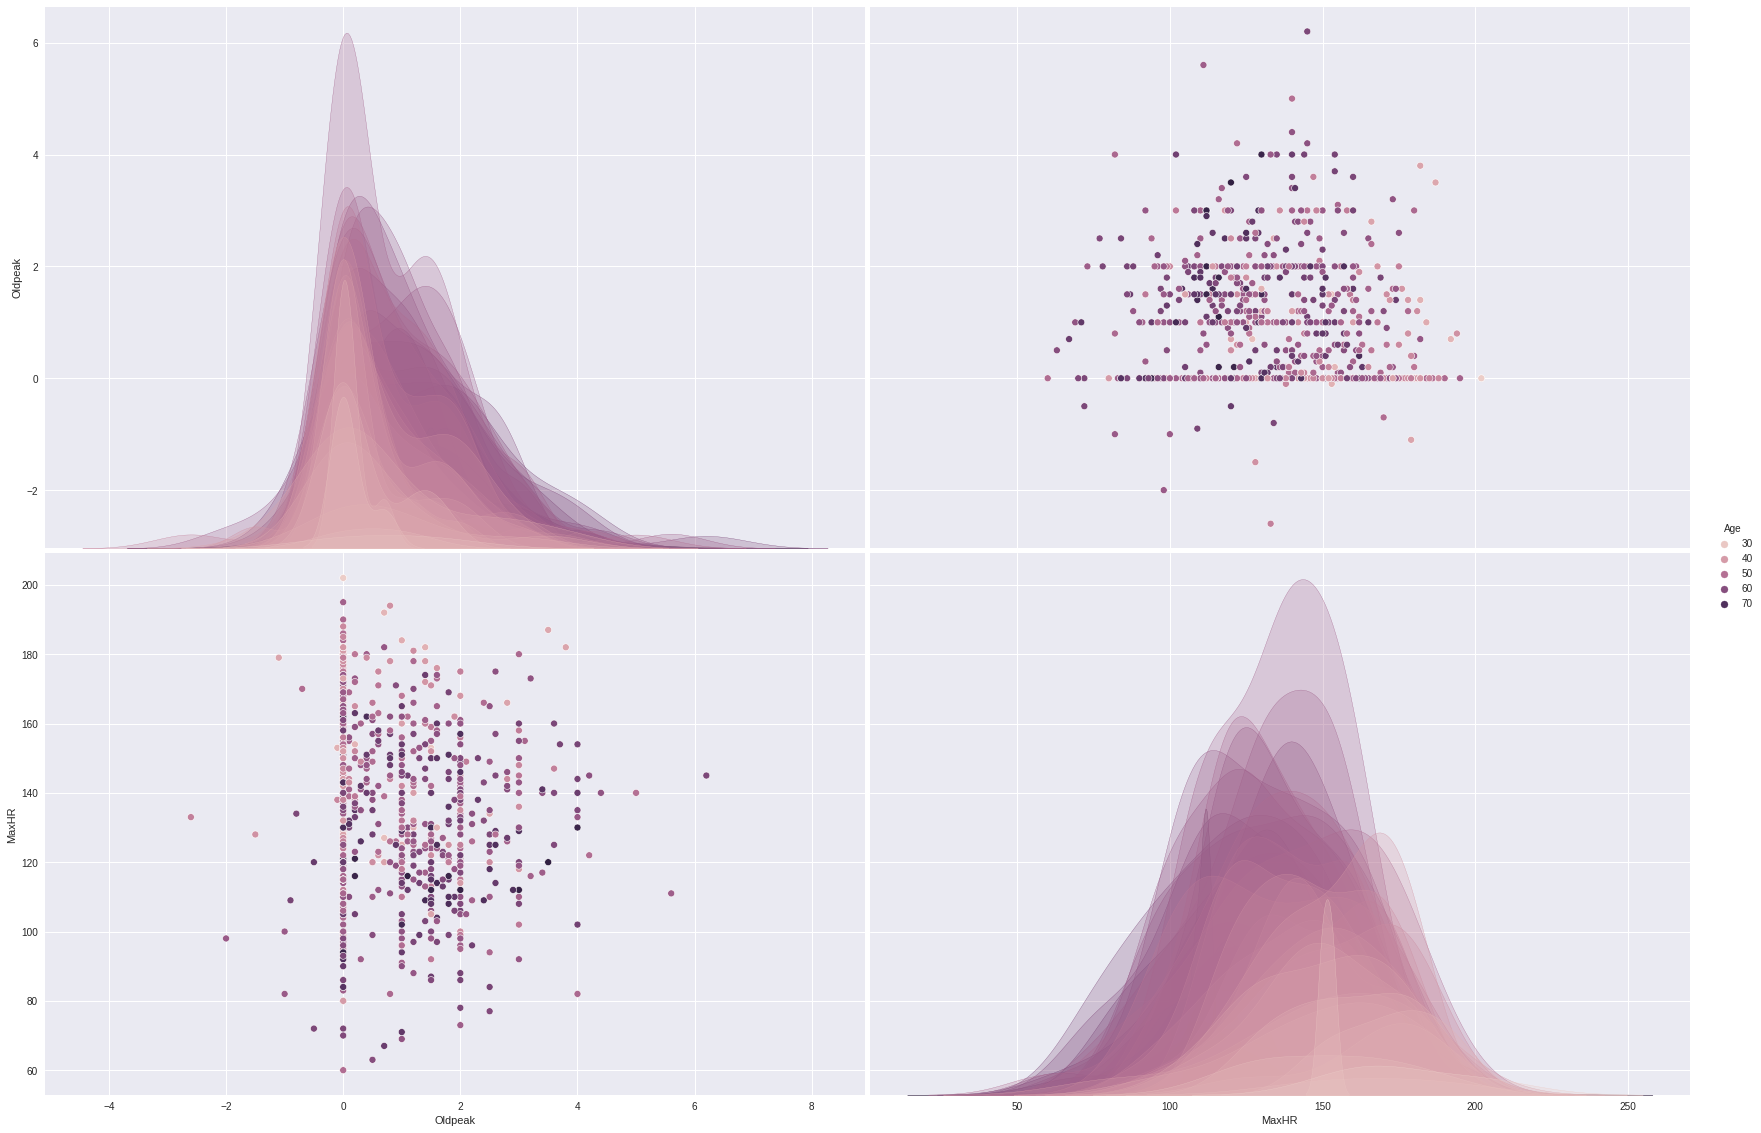

In [638]:
## Creating pairplot to better visualize the trends in the data
sns.pairplot(df_heart, vars = ["Oldpeak", "MaxHR"], hue = "Age", height = 8, aspect = 1.5);

## Trend Analysis
---

As can be seen in the abov graphs, Max Heart rate decreases with age and Oldpeak increases. The darker and this older ages show up more on the right end of the distrubtion for Oldpeak whereas the inverse is true for Max Heart Rate.

## Data Preprocessing
---


In [639]:
## Spliting the data and running the train test split
target = "HeartDisease"
X = df_heart_binned.drop(columns=target)
y = df_heart_binned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [640]:
## Organizing Columns 
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

In [641]:
## Creating Transformers 
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')

freq_imputer = SimpleImputer(strategy='most_frequent')

In [642]:
## Creating PCA with 95% variance
pca = PCA(n_components =.95)

In [643]:
## Creating pipeline
num_pipeline = make_pipeline(freq_imputer, scaler)
nom_pipeline = make_pipeline(freq_imputer, ohe)

In [644]:
## Creating Tuples for Preprocessor
numerical_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, cat_selector)

In [645]:
## Creating preprocessor
preprocessor = make_column_transformer(numerical_tuple, nominal_tuple, remainder='drop')
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1977edd3a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f19705c2790>)])

## Logistic Regression Model
---

In [647]:
## Creating baseline Logistic Regression Model with pca
logreg = LogisticRegression()
logreg_pipe = make_pipeline(preprocessor, pca, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1977edd3a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f19705c2790>)])),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression', LogisticRegression())])

In [648]:
## Printing scores of baseline model
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.8604651162790697
0.8565217391304348


In [649]:
## GridsearchCV to tune model 
log_param = {"logisticregression__C" : [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], "logisticregression__penalty" : ["l1", "l2"]}
logreg_gridsearch = GridSearchCV(logreg_pipe, log_param)

In [650]:
## Fitting model with gridsearch
logreg_gridsearch.fit(X_train, y_train)
logreg_gridsearch.best_params_

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

{'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}

In [651]:
## Creating tuned Logistic Regression Model without pca
logreg_tuned = LogisticRegression(C = 0.01, penalty = "l2")
logreg_pipe_tuned = make_pipeline(preprocessor, logreg_tuned)
logreg_pipe_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1977edd3a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f19705c2790>)])),
                ('logisticregression', LogisticRegression(C=0.01))])

In [652]:
## Printing scores of tuned model
print(logreg_pipe_tuned.score(X_train, y_train))
print(logreg_pipe_tuned.score(X_test, y_test))

0.8488372093023255
0.8347826086956521


In [653]:
## Creating tuned Logistic Regression Model with PCA
logreg_pca = LogisticRegression(C = 0.01, penalty = "l2")
logreg_pipe_pca = make_pipeline(preprocessor, pca, logreg_pca)
logreg_pipe_pca.fit(X_train, y_train)
logreg_predict_pca = logreg_pipe_pca.predict(X_test)

In [654]:
## Printing scores of tuned model with PCA
print(logreg_pipe_pca.score(X_train, y_train))
print(logreg_pipe_pca.score(X_test, y_test))

0.8473837209302325
0.8391304347826087


In [655]:
## Tuned classification report with PCA
print(classification_report(y_test, logreg_predict_pca))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        98
           1       0.89      0.83      0.85       132

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230



## Decision Tree Model
---


In [656]:
## Creating baseline Random Forest Model with pca
dt =  DecisionTreeClassifier()
dt_pipe = make_pipeline(preprocessor, pca, dt)
dt_pipe.fit(X_train, y_train)
dt_predictions = dt_pipe.predict(X_test)

In [657]:
## Printing scores of baseline model
print(dt_pipe.score(X_train, y_train))
print(dt_pipe.score(X_test, y_test))

0.9883720930232558
0.7913043478260869


In [658]:
## GridsearchCV to tune model
param_dt = {'decisiontreeclassifier__max_depth': [1,2,3],
              'decisiontreeclassifier__min_samples_leaf': [3,15,20],
              'decisiontreeclassifier__min_samples_split': [2, 10, 100]}
dt_search = GridSearchCV(dt_pipe, param_dt)

In [659]:
## Fitting and getting the best params
dt_search.fit(X_train, y_train)
dt_search.best_params_

{'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__min_samples_leaf': 20,
 'decisiontreeclassifier__min_samples_split': 2}

In [660]:
## Creating tuned Decision Tree Model
dt_tuned =  DecisionTreeClassifier(max_depth = 3, min_samples_leaf= 3, min_samples_split =2)
dt_pipe_tuned = make_pipeline(preprocessor, dt)
dt_pipe_tuned.fit(X_train, y_train)
dt_tuned_predictions = dt_pipe_tuned.predict(X_test)

In [661]:
## Printing scores of tuned model
print(dt_pipe_tuned.score(X_train, y_train))
print(dt_pipe_tuned.score(X_test, y_test))

0.9883720930232558
0.7782608695652173


In [662]:
## Tuned classification report
print(classification_report(y_test, dt_tuned_predictions))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        98
           1       0.85      0.74      0.79       132

    accuracy                           0.78       230
   macro avg       0.78      0.78      0.78       230
weighted avg       0.79      0.78      0.78       230



In [663]:
## Creating tuned Decision Tree Model with PCA
dt_pca = DecisionTreeClassifier(max_depth = 3, min_samples_leaf= 3, min_samples_split =2)
dt_pipe_pca = make_pipeline(preprocessor, pca, dt)
dt_pipe_pca.fit(X_train, y_train)
dt_pipe_pca_predictions = dt_pipe_pca.predict(X_test)

In [664]:
## Printing scores of tuned model with PCA
print(dt_pipe_pca.score(X_train, y_train))
print(dt_pipe_pca.score(X_test, y_test))

0.9883720930232558
0.7695652173913043


In [665]:
## Tuned classification report with PCA
print(classification_report(y_test, dt_pipe_pca_predictions))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75        98
           1       0.84      0.73      0.79       132

    accuracy                           0.77       230
   macro avg       0.77      0.78      0.77       230
weighted avg       0.78      0.77      0.77       230

